In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(760, 820)

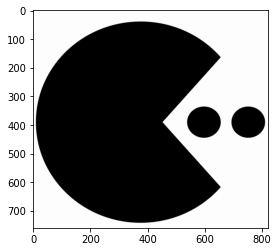

In [2]:
obj = np.array(Image.open("object.png"))[:, :, 0]
plt.imshow(obj, cmap="gray")
obj.shape

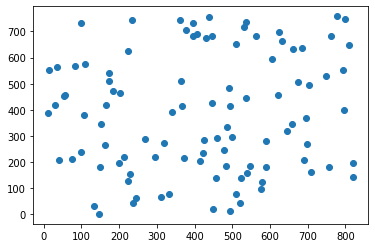

In [3]:
gen_num = 100
a = np.random.uniform(0, obj.shape[1], gen_num)
b = np.random.uniform(0, obj.shape[0], gen_num)
rand_map = np.vstack((a, b)).astype('int')
plt.plot(rand_map[0, :], rand_map[1, :], 'o')

In [4]:
# mapping
a = obj[rand_map[1, :], rand_map[0, :]] == 0
# find number of point in zone
print(a)
number_of_p_in_zone = np.sum(a)

[False  True  True  True  True  True  True False False  True False False
 False False  True  True  True  True  True False  True  True False  True
  True  True  True  True False  True  True False  True False  True False
  True  True False  True False False False False  True  True False False
 False  True  True False  True  True  True  True  True  True  True  True
 False  True False  True False  True  True  True False False  True False
 False  True  True  True  True  True False  True  True  True False  True
 False False False  True  True False False  True False  True False False
 False False  True False]


In [5]:
area = (number_of_p_in_zone / gen_num) * obj.shape[0]*obj.shape[1]
print(area)
print(obj.shape[0]*obj.shape[1])

361455.99999999994
623200


In [6]:
def MCarea(total_area, gen_num):
    obj = np.array(Image.open("object.png"))[:, :, 0]
    a = np.random.uniform(0, len(obj[0, :]), gen_num)
    b = np.random.uniform(0, len(obj[:, 0]), gen_num)
    rand_map = np.vstack((a, b)).astype('int')
    plt.plot(rand_map[0, :], rand_map[1, :], 'o')

    # mapping
    a = obj[rand_map[1, :], rand_map[0, :]] == 0
    # find number of point in zone
    number_of_p_in_zone = np.sum(a)

    # area
    area = (number_of_p_in_zone / gen_num) * total_area

    return (area)

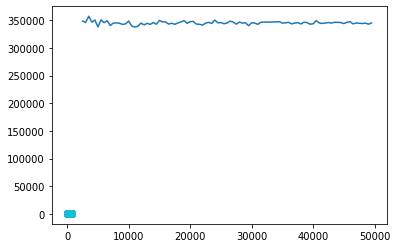

In [12]:
# test on stability
gen_test = np.arange(10, 50000, 500)
data = []
for i in range(len(gen_test)):
    data.append(MCarea(obj.shape[0]*obj.shape[1], gen_test[i]))

plt.plot(gen_test[5:], data[5:])

